In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import RELACS as rel
sns.set_style("white")
sns.set_context("paper")
%load_ext rpy2.ipython
%matplotlib inline

/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Visualization of expression dynamics consequent to EPZ treatment of NPC marker genes and neuronal cell-type marker genes in our NPC48h dataset

In [7]:
%%R 
# -o tpm_npc_batch tpm_esc_batch 

### PERFORM BATCH CORRECTION USING LIMMA AND COMBAT on TPM NORMALIZED COUNTS ###
libr = "/home/ferrari/R/x86_64-redhat-linux-gnu-library/3.5/"

library(limma, lib=libr)
library(sva, lib=libr)

tpm_npc = read.csv("../INPUT_DATA/counts_NPC48h_TPM_corrected.tsv", sep="\t")
row.names(tpm_npc) = tpm_npc$GeneID
tpm_npc$GeneID = NULL
colnames(tpm_npc) = c("NPC48h_DMSO_2","NPC48h_EPZ_2a",
                      "NPC48h_DMSO_4","NPC48h_EPZ_4a",
                      "NPC48h_DMSO_5","NPC48h_EPZ_5a")


tpm_esc = read.csv("../INPUT_DATA/counts_mESC_TPM.tsv", sep="\t")
row.names(tpm_esc) = tpm_esc$X
tpm_esc$X = NULL

## with LIMMA
tpm_npc_batch = removeBatchEffect(tpm_npc, batch = c("A","A","B","B","C","C"))
tpm_npc_batch = as.data.frame(tpm_npc_batch)
write.table(tpm_npc_batch, "../INTERMEDIATE_FILES/batch_corrected_TPM_NPC48h.tsv", quote=F, sep="\t")

tpm_esc_batch = removeBatchEffect(tpm_esc, batch = c("A","B","C","A","B","C"))
tpm_esc_batch = as.data.frame(tpm_esc_batch)
write.table(tpm_esc_batch, "../INTERMEDIATE_FILES/batch_corrected_TPM_mESC.tsv", quote=F, sep="\t")




In [3]:
tr = pd.read_csv("../INPUT_DATA/TSS.bed", sep="\t", header=None, index_col=3)
tr_ens = tr[6].to_dict()
tr = pd.read_csv("../INPUT_DATA/TSS.bed", sep="\t", header=None, index_col=6)
tr_sym = tr[3].to_dict()

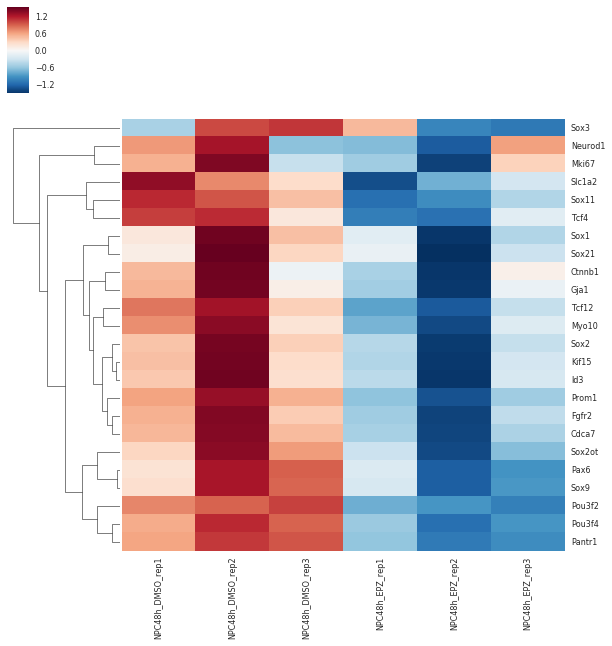

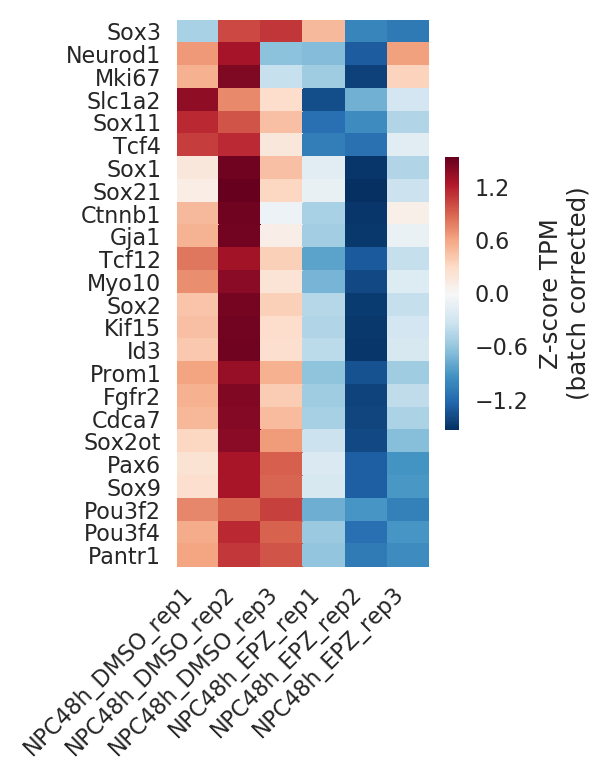

In [4]:
### CREATE HEATMAP OF PROGENITOR MARKERS ###
### THE LIST IS MANUALLY CURATED BASED ON TWO SINGLE CELL PAPERS and one review:
### Single-cell transcriptomic analysis of mouse neocortical development;
### Single-Cell Transcriptomics Characterizes Cell Types in the Subventricular Zone and Uncovers Molecular Defects Impairing Adult Neurogenesis;
### Molecular Biomarkers for Embryonic and Adult Neural Stem Cell and Neurogenesis;


marker_genes = ["Neurod1","Sox11","Sox2","Pax6","Pou3f2","Pou3f4","Sox9","Fgfr2","Ctnnb1","Sox1","Sox3","Sox21",
                "Pantr1","Cdca7","Sox2ot","Kif15","Prom1","Tcf12","Tcf4","Myo10","Id3","Slc1a2","Gja1","Mki67"]

tpm_npc_batch_ = pd.read_csv("../INTERMEDIATE_FILES/batch_corrected_TPM_NPC48h.tsv", sep="\t")
tpm_npc_batch_.index = [tr_ens[i] if i in tr_ens else i for i in tpm_npc_batch_.index]
tpm_npc_batch_ = tpm_npc_batch_[["NPC48h_DMSO_2","NPC48h_DMSO_4","NPC48h_DMSO_5","NPC48h_EPZ_2a","NPC48h_EPZ_4a","NPC48h_EPZ_5a"]]
tpm_npc_batch_.columns = ["NPC48h_DMSO_rep1","NPC48h_DMSO_rep2","NPC48h_DMSO_rep3","NPC48h_EPZ_rep1","NPC48h_EPZ_rep2","NPC48h_EPZ_rep3"]
res = sns.clustermap(tpm_npc_batch_.loc[marker_genes], z_score=0, cmap="RdBu_r", center=0, col_cluster=False)

fig,ax = plt.subplots(dpi=200,figsize=(3,4))
sns.heatmap(res.data2d, cmap="RdBu_r",ax=ax, cbar_kws={'label': 'Z-score TPM\n(batch corrected)', "shrink": 0.5})
plt.xticks(rotation=45,ha="right") 
plt.tight_layout()

plt.savefig("../FIGURES/NPC_heatmap_progenitor_markers.pdf")

In [206]:
# %%bash

# extract_from_gtf.py -f TSS -w transcript -o ../INPUT_DATA/ \
# /home/ferrari/ferrari/my_repository/annotations_gencode/mouse/M18/annotation_snakePipes/gencode.vM18.annotation.sorted.gtf

Namespace(AFTER_GENE=0, AFTER_TES=500, AFTER_TSS=500, BEFORE_GENE=0, BEFORE_TES=500, BEFORE_TSS=1000, FEATURE=['TSS'], PROTEIN_CODING=False, from_what='transcript', gtf_file='/home/ferrari/ferrari/my_repository/annotations_gencode/mouse/M18/annotation_snakePipes/gencode.vM18.annotation.sorted.gtf', out_dir='../INPUT_DATA/', verbose=False)


In [5]:
# Single-Cell Transcriptomics Characterizes Cell Types in the Subventricular Zone and Uncovers Molecular Defects Impairing Adult Neurogenesis

sheet_to_df_map = pd.read_excel("../INPUT_DATA/Rajewsky_SC.xlsx", sheet_name=None)
sheet_to_df_map.keys()


odict_keys(['cl1_Endothelial_Cells', 'cl2_Pericytes', 'cl3_SMCs', 'cl4_Microglia', 'cl5_PVMs', 'cl6_Ependymal_Cells', 'cl7_D1 MSNs', 'cl8_D2_MSNs', 'cl9_COPs', 'cl10_MOLs', 'cl11_MFOLs2', 'cl12_MFOLs1', 'cl13_Neuroblasts', 'cl14_TAPs', 'cl15_OPCs', 'cl16_Astrocytes', 'cl17_NSCs', 'Sheet17'])

In [6]:
de_npc = pd.read_csv("../INTERMEDIATE_FILES/DE_genes_shrinked_apeglm_NPC48h_EPZvsDMSO.tsv", sep="\t")
de_npc_ = de_npc.loc[de_npc.padj < 0.1]["symbol"].values
de_npc_down = de_npc.loc[(de_npc.padj < 0.1)&(de_npc.log2FoldChange < 0)]["symbol"].values
de_npc_up = de_npc.loc[(de_npc.padj < 0.1)&(de_npc.log2FoldChange > 0)]["symbol"].values

de_esc = pd.read_csv("../INTERMEDIATE_FILES/DE_genes_shrinked_apeglm_mESC_EPZvsDMSO.tsv", sep="\t")
de_esc_ = de_esc.loc[de_esc.padj<0.1]["symbol"].values


In [7]:
### compute overlap of DEG set with neuronal cell-type markers ### 

dixio=dict()
for i in list(sheet_to_df_map.keys())[:-1]:
    gg = sheet_to_df_map[i]["gene"].values
    n = [tr_sym[i] for i in gg if i in tr_sym]
    if len(n)>0:
        df = tpm_npc_batch_.loc[gg].replace([np.inf,-np.inf],np.nan).dropna()
        mean = df.T.mean(axis=0)
        std = df.T.std(axis=0)
        df = ((df.T - mean) / std).T
        df.dropna(inplace=True)
        a = pd.DataFrame(data = np.corrcoef(df.T), index=df.columns, columns = df.columns)
        #sns.clustermap(a, annot=True)
        dixio[i] = [len(set(gg).intersection(set(de_npc_)))/len(gg), int(len(gg)),int(len(set(gg).intersection(set(de_npc_)))), int(len(set(gg).intersection(set(de_npc_down)))) / len(gg), int(len(set(gg).intersection(set(de_npc_up)))) / len(gg), set(gg).intersection(set(de_npc_)), len(set(gg).intersection(set(de_npc_down)))]

/package/anaconda3/bin/ipython:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


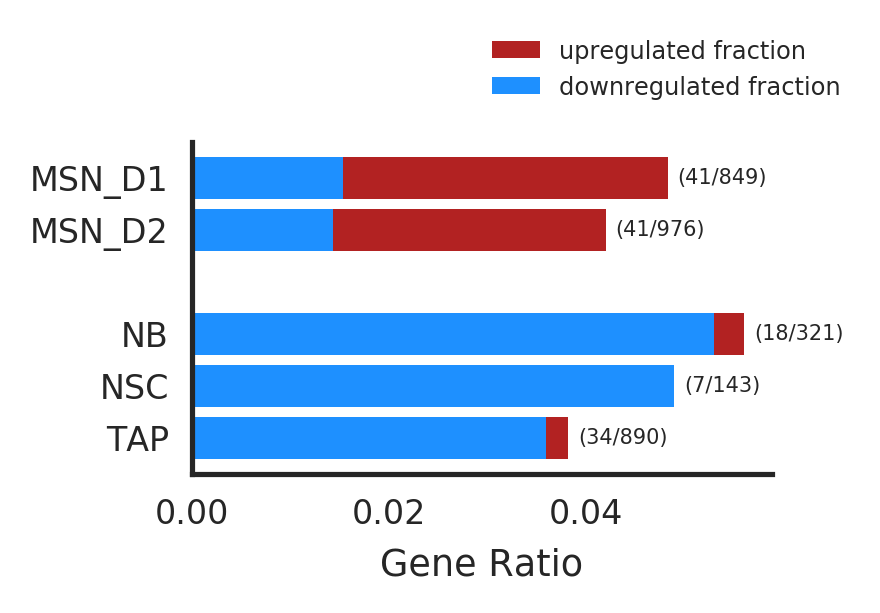

In [8]:
### PLOT RESULTS ###

fig,ax=plt.subplots(dpi=300, figsize=(3,2.2))
df_geneRatio = pd.DataFrame(dixio).T.sort_values(by=0,ascending=True)
df_geneRatio = df_geneRatio.loc[["cl14_TAPs",'cl17_NSCs',"cl13_Neuroblasts","cl8_D2_MSNs","cl7_D1 MSNs"]]#.sort_values(by=0,ascending=True)
df_geneRatio.index = ["TAP","NSC","NB", "MSN_D2","MSN_D1"]
ax.barh([0,1,2,4,5],df_geneRatio[0], color='firebrick', label="upregulated fraction")
ax.barh([0,1,2,4,5],df_geneRatio[3],color='dodgerblue', label="downregulated fraction")

for i,j in zip(range(df_geneRatio.shape[0]),[0,1,2,4,5]):
    ax.annotate("({}/{})".format(int(df_geneRatio[2].values[i]),int(df_geneRatio[1].values[i])), (df_geneRatio[0].values[i]+0.001,j-0.1), size=5)


ax.set_yticks([0,1,2,4,5])
ax.set_yticklabels(df_geneRatio.index)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Gene Ratio")
ax.legend(loc=(0.5,1.1), fontsize="xx-small", frameon=False)
plt.tight_layout()

plt.savefig("../FIGURES/intersect_DEG-NPC48h-SC-RAJEWSKY.pdf")

### TAP: TRANSIENT AMPLIFYING PROGENITORS
### NSC: NEURAL STEM CELLS
### NB: NEUROBLASTS
### MSN: MEDIUM SPINY NEURONS